# Libraries and bibliography used

In [ ]:
# Here we install and import all the libraries needed
!pip install PyDSTool
from PyDSTool import *
import numpy as np
from matplotlib import pyplot as plt

Some bibliography:


*   https://www.ebi.ac.uk/biomodels/BIOMD0000000012#Overview
*   http://2017.igem.org/Team:SCU_China/Model/Repressilator
*   https://sysmic.ac.uk/static/html_module1/1.9-the-repressilator.html



# **Oscillatory state**

In [ ]:
## Parameters selected: 
# a --> repression strength
# a0 --> basal rate of expression of each gene
# b --> ratio of the protein decay rate to the mRNA decay rate (DEGRADATION RATE)
# n --> Hill coeficient --> determines the DIMENSIONALITY  of the protein. n = 1 --> monomer; n = 2 --> dimer...

#pars = {'a': 10, 'a0': 0.001, 'b':0.1, 'n': 100}  # setting parameters for unstable oscillations

# FINAL CHOICE:
pars = {'a': 200, 'a0':0.2, 'b':0.5, 'n':2}  # setting parameters for stable oscillations

In [ ]:
## INITIAL CONCENTRATIONS
#pi --> repressor-protein concentrations
#mi --> mRNA concentrations corresponding to the repressor-proteins

## Different initial conditions:

#icdict = {'m1':100 , 'm2':80, 'm3':50, 'p1': 10, 'p2':10, 'p3': 10} 

#icdict = {'m1':50, 'm2':40, 'm3':5, 'p1': 10, 'p2':10, 'p3': 10}

#icdict = {'m1':50, 'm2':70, 'm3':50, 'p1': 200, 'p2':0, 'p3': 100}

icdict = {'m1':5, 'm2':7, 'm3':5, 'p1': 5, 'p2':10, 'p3': 10}


In [ ]:
## Establishing the ODE System:

# How mRNA concentrations change over time:
m1str = '-m1 + a/(1+p3^n) + a0'
m2str = '-m2 + a/(1+p1^n) + a0'
m3str = '-m3 + a/(1+p2^n) + a0'

# How repressor-protein concentrations change over time:
p1str = '-b*(p1-m1)'
p2str = '-b*(p2-m2)'
p3str = '-b*(p3-m3)'

In [ ]:
## Defining parameters, ranges and conditions for establishing the graphs:

DSargs = args(name='Repressilator')
DSargs.pars = pars
DSargs.tdata = [0, 200]  # setting the time span over which you want to simulate the data
DSargs.algparams = {'max_pts': 3000, 'init_step': 0.02, 'stiff': True} # Parameters of the Solver
DSargs.varspecs = {'m1': m1str, 'm2': m2str, 'm3': m3str, 'p1': p1str, 'p2': p2str, 'p3': p3str}
DSargs.xdomain = {'m1': [0,10], 'm2':[0,10], 'm3':[0,10] , 'p1':[0,10], 'p2': [0,10], 'p3': [0,10]}
DSargs.ics = icdict   # Initial conditions
vdp = Generator.Vode_ODEsystem(DSargs)
traj = vdp.compute('test_traj')
pts = traj.sample(dt = 0.1)
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'm')

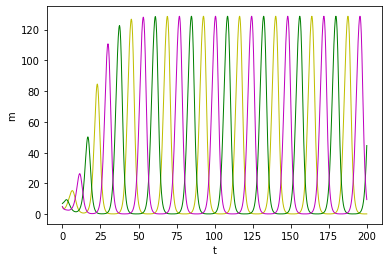

In [ ]:
## Here we will plot the oscillatory dynamics of the mRNA concentrations:

plt.plot(pts['t'], pts['m1'], 'y', linewidth=1)
plt.plot(pts['t'], pts['m2'], 'g', linewidth=1)
plt.plot(pts['t'], pts['m3'], 'm', linewidth=1)

plt.xlabel('t')
plt.ylabel('m') 

Text(0, 0.5, 'p')

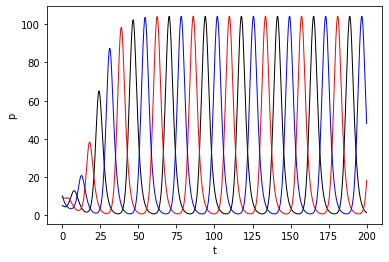

In [ ]:
## Here we will plot the oscillatory dynamics of the repressor-protein concentrations:

plt.plot(pts['t'], pts['p1'], 'k', linewidth=1)
plt.plot(pts['t'], pts['p2'], 'r', linewidth=1)
plt.plot(pts['t'], pts['p3'], 'b', linewidth=1)

plt.xlabel('t')
plt.ylabel('p') 

# **Steady states and  Equlibrium Curves**

## Steady state #1 (Changing the "a0" parameter)

In [ ]:
##pars = {'a': 200, 'a0':0.2, 'b': 0.5, 'n':2} # --> OSCILLATIONS

#pars = {'a': 200, 'a0':0.2, 'b': 0.000001, 'n':2} ## --> Changing the "beta" parameter (lower)
pars = {'a': 200, 'a0':5, 'b': 0.5, 'n':2} ## --> Changing the "a0" parameter (higher)
#pars = {'a': 0.1, 'a0':0.2, 'b': 0.5, 'n':2} ## --> Changing the "a" parameter (lower)
#pars = {'a': 200, 'a0':0.2, 'b': 0.5, 'n':1} ## --> Changing the "n" parameter (lower)

In [ ]:
## INITIAL CONCENTRATIONS
#pi --> repressor-protein concentrations
#mi --> mRNA concentrations corresponding to the repressor-proteins

## Different initial conditions:

#icdict = {'m1':100 , 'm2':80, 'm3':50, 'p1': 10, 'p2':10, 'p3': 10} 

#icdict = {'m1':50, 'm2':40, 'm3':5, 'p1': 10, 'p2':10, 'p3': 10}

#icdict = {'m1':50, 'm2':70, 'm3':50, 'p1': 200, 'p2':0, 'p3': 100}

icdict = {'m1':5, 'm2':7, 'm3':5, 'p1': 5, 'p2':10, 'p3': 10}

In [ ]:
## Establishing the ODE System:

# How mRNA concentrations change over time:
m1str = '-m1 + a/(1+p3^n) + a0'
m2str = '-m2 + a/(1+p1^n) + a0'
m3str = '-m3 + a/(1+p2^n) + a0'

# How repressor-protein concentrations change over time:
p1str = '-b*(p1-m1)'
p2str = '-b*(p2-m2)'
p3str = '-b*(p3-m3)'

In [ ]:
## Defining parameters, ranges and conditions for establishing the graphs:

DSargs = args(name='Repressilator')
DSargs.pars = pars
DSargs.tdata = [0, 200]  # setting the time span over which you want to simulate the data
DSargs.algparams = {'max_pts': 3000, 'init_step': 0.02, 'stiff': True} # Parameters of the Solver
DSargs.varspecs = {'m1': m1str, 'm2': m2str, 'm3': m3str, 'p1': p1str, 'p2': p2str, 'p3': p3str}
DSargs.xdomain = {'m1': [0,10], 'm2':[0,10], 'm3':[0,10] , 'p1':[0,10], 'p2': [0,10], 'p3': [0,10]}
DSargs.ics = icdict   # Initial conditions
vdp = Generator.Vode_ODEsystem(DSargs)
traj = vdp.compute('test_traj')
pts = traj.sample(dt = 0.1)
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'm')

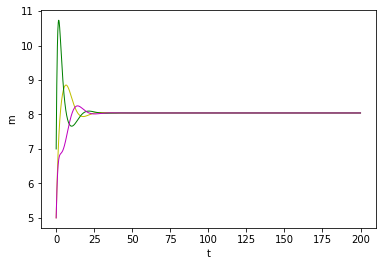

In [ ]:
## Here we will plot the obtained  steady state of the mRNA concentrations:

plt.plot(pts['t'], pts['m1'], 'y', linewidth=1)
plt.plot(pts['t'], pts['m2'], 'g', linewidth=1)
plt.plot(pts['t'], pts['m3'], 'm', linewidth=1)

plt.xlabel('t')
plt.ylabel('m') 

Text(0, 0.5, 'p')

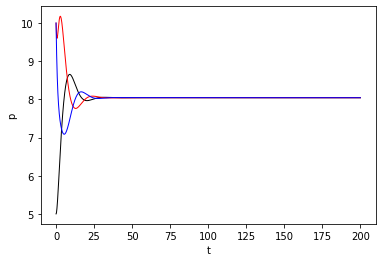

In [ ]:
## Here we will plot the obtained  steady state of the repressor-protein concentrations:

plt.plot(pts['t'], pts['p1'], 'k', linewidth=1)
plt.plot(pts['t'], pts['p2'], 'r', linewidth=1)
plt.plot(pts['t'], pts['p3'], 'b', linewidth=1)

plt.xlabel('t')
plt.ylabel('p')

## Bifurcation plot #1

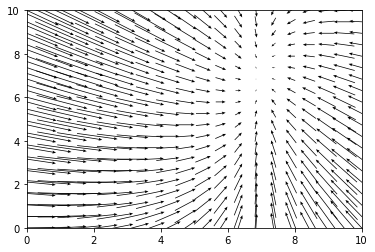

In [ ]:
# Generating the phase plane:
from PyDSTool.Toolbox import phaseplane as pp
pp.plot_PP_vf(vdp,'m1', 'p1',scale_exp=-0.01)

In [ ]:
# Finding fixed points:
fp_corr = pp.find_fixedpoints(vdp, n=4, eps = 1e-6)
print(fp_corr)

# The only point found represents the EQUILIBRIUM POINT

({'m1': 8.04392265898272, 'm2': 8.043922658982725, 'm3': 8.043922658982726, 'p1': 8.04392265898272, 'p2': 8.043922658982725, 'p3': 8.043922658982726},)


In [ ]:
nulls_x, nulls_y = pp.find_nullclines(vdp,'m1','p1', n=1, eps = 1e-6, max_step=0.1, fps=fp_corr)

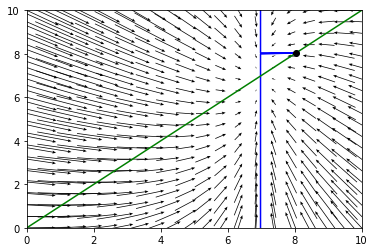

In [ ]:
# Finding Attractors --> Points at which the two curves intersect
pp.plot_PP_vf(vdp,'m1','p1', scale_exp=-0.01)
plt.plot(nulls_x[:,0],nulls_x[:,1],'b')
plt.plot(nulls_y[:,0],nulls_y[:,1],'g')
plt.plot(fp_corr[0]['m1'],fp_corr[0]['p1'],'ko')

In [ ]:
PyCont  = ContClass(vdp)
#Using the arguments EQUILIBRIUM and EQUILIBRIUM POINT CURVE:
PCargs = args(name='EQ1', type ='EP-C')
# Here we set the variable on which we plot the bifurcation diagram:
PCargs.freepars=['a0']

# Settings:
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints=200
PCargs.MaxStepSize=1e-2
PCargs.LocBifPoints='all'
PCargs.verbosity = 2

PyCont.newCurve(PCargs)

Computing equlibrium curve...
Checking...
  |q| = 1.000000
  |<p,q> - 1| =  1.5020313877718258e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
m1  =  6.528669487754009
m2  =  6.528669487754009
m3  =  6.528669487754009
p1  =  6.528669487754009
p2  =  6.528669487754009
p3  =  6.528669487754009
a0  =  1.9439872844067287

Eigenvalues = 

     (-1.500000,0.396143)
     (-1.500000,-0.396143)
     (-0.750000,0.789709)
     (-0.750000,-0.789709)
     (0.000000,0.396143)
     (0.000000,-0.396143)


w = 0.39614349801668897
l1 = 0.01155110869026807



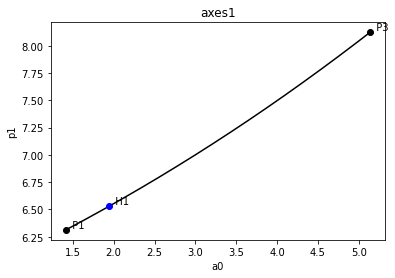

In [ ]:
print('Computing equlibrium curve...')
PyCont['EQ1'].forward()
PyCont['EQ1'].backward()
PyCont['EQ1'].forward()
PyCont['EQ1'].display(('a0','p1'), stability=True)
show()

Computing equlibrium curve...


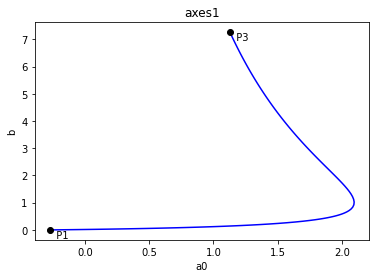

In [ ]:
PCargs = args(name='H1', type='H-C1') # Now we will start from the Hopf point curve obtained --> https://pydstool.github.io/PyDSTool/PyCont.html#head-09a6def9c681c8100fb4ba6ea9f6b908e01ec1c5
PCargs.initpoint ='EQ1:H1'
PCargs.freepars=['b','a0'] # We will identify the region/combination of parameters that give us the steady points.
PCargs.MaxNumPoints = 40

PyCont.newCurve(PCargs)

print('Computing equlibrium curve...')
PyCont['H1'].forward()
PyCont['H1'].backward()
PyCont['H1'].forward()

PyCont['H1'].display(('a0','b'))
show()

This is the bifurcation diagram of a0 and b. We can see a **Oscillatory zone** when the value of b is between 0 and 7, and a0 is between 0 and 2.1 --> ***Area between P1 and P3.***

The **Steady zone** is present when the values of a0 and b are outside the aforementioned conditions --> ***Area outside P1 and P3.***

To summarize, all combinations of parameters on the **left side of the blue line** will generate ***oscillatory patterns in the system***, while those on the **right side** will produce a ***stationary behavior of the system***. 
The points defined by the **blue line** will therefore define the ***different transitions between one state and the other.***

Now, we will follow the same steps, but this time we will modify the parameter "n"

## Steady state #2

In [ ]:
##pars = {'a': 200, 'a0':0.2, 'b': 0.5, 'n':2} # --> OSCILLATIONS

pars = {'a': 200, 'a0':0.2, 'b': 0.5, 'n':1} ## --> Changing the "n" parameter (lower)

In [ ]:
## INITIAL CONCENTRATIONS
#pi --> repressor-protein concentrations
#mi --> mRNA concentrations corresponding to the repressor-proteins

## Different initial conditions:

#icdict = {'m1':100 , 'm2':80, 'm3':50, 'p1': 10, 'p2':10, 'p3': 10} 

#icdict = {'m1':50, 'm2':40, 'm3':5, 'p1': 10, 'p2':10, 'p3': 10}

#icdict = {'m1':50, 'm2':70, 'm3':50, 'p1': 200, 'p2':0, 'p3': 100}

icdict = {'m1':5, 'm2':7, 'm3':5, 'p1': 5, 'p2':10, 'p3': 10}

In [ ]:
## Establishing the ODE System:

# How mRNA concentrations change over time:
m1str = '-m1 + a/(1+p3^n) + a0'
m2str = '-m2 + a/(1+p1^n) + a0'
m3str = '-m3 + a/(1+p2^n) + a0'

# How repressor-protein concentrations change over time:
p1str = '-b*(p1-m1)'
p2str = '-b*(p2-m2)'
p3str = '-b*(p3-m3)'

In [ ]:
## Defining parameters, ranges and conditions for establishing the graphs:

DSargs = args(name='Repressilator')
DSargs.pars = pars
DSargs.tdata = [0, 200]  # setting the time span over which you want to simulate the data
DSargs.algparams = {'max_pts': 3000, 'init_step': 0.02, 'stiff': True} # Parameters of the Solver
DSargs.varspecs = {'m1': m1str, 'm2': m2str, 'm3': m3str, 'p1': p1str, 'p2': p2str, 'p3': p3str}
DSargs.xdomain = {'m1': [0,10], 'm2':[0,10], 'm3':[0,10] , 'p1':[0,10], 'p2': [0,10], 'p3': [0,10]}
DSargs.ics = icdict   # Initial conditions
vdp = Generator.Vode_ODEsystem(DSargs)
traj = vdp.compute('test_traj')
pts = traj.sample(dt = 0.1)
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'm')

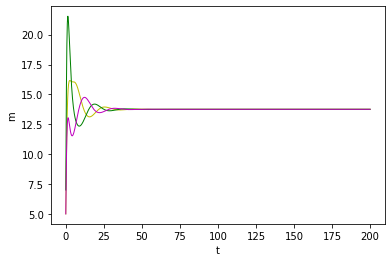

In [ ]:
## Here we will plot the obtained  steady state of the mRNA concentrations:

plt.plot(pts['t'], pts['m1'], 'y', linewidth=1)
plt.plot(pts['t'], pts['m2'], 'g', linewidth=1)
plt.plot(pts['t'], pts['m3'], 'm', linewidth=1)

plt.xlabel('t')
plt.ylabel('m') 

Text(0, 0.5, 'p')

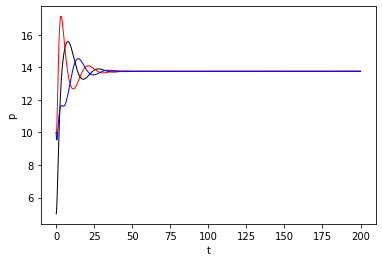

In [ ]:
## Here we will plot the obtained  steady state of the repressor-protein concentrations:

plt.plot(pts['t'], pts['p1'], 'k', linewidth=1)
plt.plot(pts['t'], pts['p2'], 'r', linewidth=1)
plt.plot(pts['t'], pts['p3'], 'b', linewidth=1)

plt.xlabel('t')
plt.ylabel('p')

## Bifurcation plot #2

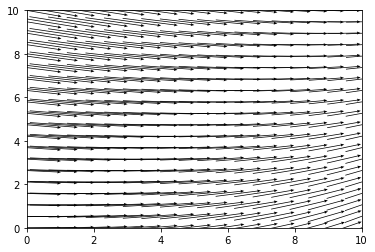

In [ ]:
# Generating the phase plane:
from PyDSTool.Toolbox import phaseplane as pp
pp.plot_PP_vf(vdp,'m1', 'p1',scale_exp=-0.01)

In [ ]:
# Finding fixed points:
fp_corr = pp.find_fixedpoints(vdp, n=4, eps = 1e-6)
print(fp_corr)

()


In [ ]:
#nulls_x, nulls_y = pp.find_nullclines(vdp,'m1','p1', n=1, eps = 1e-6, max_step=0.1, fps=fp_corr)

In [ ]:
## Finding Attractors --> Points at which the two curves intersect
#pp.plot_PP_vf(vdp,'m1','p1', scale_exp=-0.01)
#plt.plot(nulls_x[:,0],nulls_x[:,1],'b')
#plt.plot(nulls_y[:,0],nulls_y[:,1],'g')
#plt.plot(fp_corr[0]['m1'],fp_corr[0]['p1'],'ko')

In [ ]:
PyCont  = ContClass(vdp)
#Using the arguments EQUILIBRIUM and EQUILIBRIUM POINT CURVE:
PCargs = args(name='EQ1', type ='EP-C')
# Here we set the variable on which we plot the bifurcation diagram:
PCargs.freepars=['n']

# Settings:
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints=200
PCargs.MaxStepSize=1e-2
PCargs.LocBifPoints='all'
PCargs.verbosity = 2

PyCont.newCurve(PCargs)

Computing equlibrium curve...
Checking...
  |q| = 1.000000
  |<p,q> - 1| =  1.1647968417755002e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
m1  =  8.506286234195723
m2  =  8.506286234195723
m3  =  8.506286234195723
p1  =  8.506286234195723
p2  =  8.506286234195723
p3  =  8.506286234195723
n  =  1.4662174257547766

Eigenvalues = 

     (-1.500000,0.396143)
     (-1.500000,-0.396143)
     (-0.750000,0.789709)
     (-0.750000,-0.789709)
     (0.000000,0.396143)
     (0.000000,-0.396143)


w = 0.39614349555702827
l1 = 0.004796456554307365



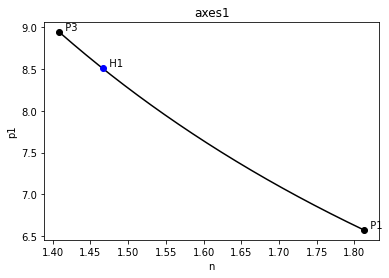

In [ ]:
print('Computing equlibrium curve...')
PyCont['EQ1'].forward()
PyCont['EQ1'].backward()
PyCont['EQ1'].forward()
PyCont['EQ1'].display(('n','p1'), stability=True)
show()

Computing equlibrium curve...


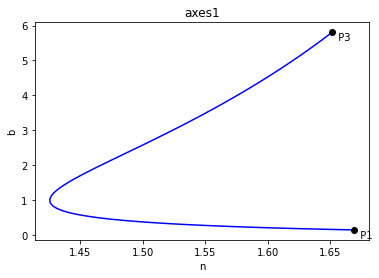

In [ ]:
PCargs = args(name='H1', type='H-C1') # Now we will start from the Hopf point curve obtained --> https://pydstool.github.io/PyDSTool/PyCont.html#head-09a6def9c681c8100fb4ba6ea9f6b908e01ec1c5
PCargs.initpoint ='EQ1:H1'
PCargs.freepars=['b','n'] # We will identify the region/combination of parameters that give us the steady points.
PCargs.MaxNumPoints = 40

PyCont.newCurve(PCargs)

print('Computing equlibrium curve...')
PyCont['H1'].forward()
PyCont['H1'].backward()
PyCont['H1'].forward()

PyCont['H1'].display(('n','b'))
show()

This is the bifurcation diagram of a0 and b. We can see a **Oscillatory zone** when the value of b is between 0.2 and 5.5, and n is between 1.42 and 1.67 (and beyond) --> ***Area between P1 and P3.***

The **Steady zone** is present when the values of n and b are outside the aforementioned conditions --> ***Area outside P1 and P3.***

To summarize, all combinations of parameters on the **right side of the blue line** will generate ***oscillatory patterns in the system***, while those on the **left side** will produce a ***stationary behavior of the system***. 
The points defined by the **blue line** will therefore define the ***different transitions between one state and the other.***